In [37]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
symbol = "AAPL"  
start_date = "2024-08-01"
end_date = "2024-12-03"
api_url = "http://127.0.0.1:5000/predict"

[*********************100%***********************]  1 of 1 completed

Baixando dados...
Enviando dados para a API...


Previsões recebidas:
[229.04490661621094, 229.02236938476562, 229.03424072265625, 229.0637664794922, 228.8302764892578, 228.15853881835938, 227.05453491210938, 225.69493103027344, 224.3690948486328, 223.08274841308594, 222.27774047851562, 221.7627716064453, 221.2849578857422, 220.89804077148438, 220.66726684570312, 220.7838897705078, 220.8546142578125, 221.15647888183594, 221.58169555664062, 222.1162567138672, 222.64634704589844, 223.2458953857422, 224.0631561279297, 225.1045684814453, 226.19386291503906, 227.42410278320312, 228.80747985839844]


c:\Users\Rod PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rod PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rod PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rod PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

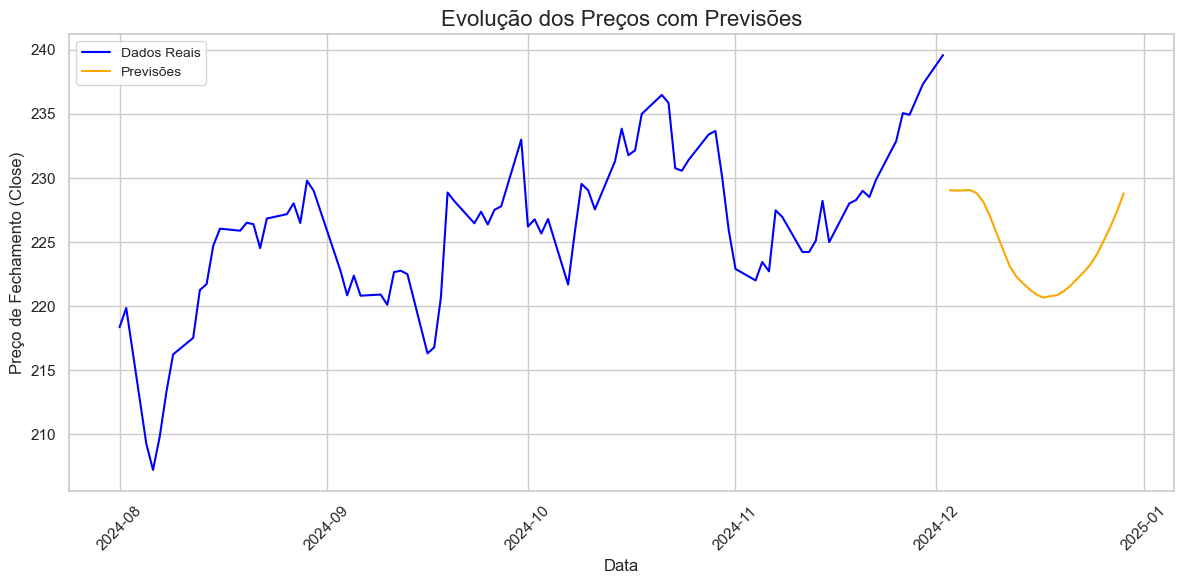

In [ ]:
# Baixar os dados da AAPL
print("Baixando dados...")
df = yf.download(symbol, start=start_date, end=end_date)

# Ignorar as duas primeiras linhas e renomear as colunas
df.columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
df = df[["Close"]].copy()  # Filtrar apenas a coluna 'Close'
df.reset_index(inplace=True)

# Preparar os últimos 70 valores para a API
prices = df["Close"].values[:].tolist()  # Extrair os últimos 70 valores

# Enviar os dados para a API
print("Enviando dados para a API...")
payload = {"prices": prices}
response = requests.post(api_url, json=payload)

if response.status_code == 200:
    # Buscar as previsões na API
    predictions = response.json()["predictions"]
    print("Previsões recebidas:")
    print(predictions)
    
    # Adicionar previsões no dataframe
    prediction_dates = pd.date_range(start=df["Date"].iloc[-1] + pd.Timedelta(days=1), periods=len(predictions))
    predictions_df = pd.DataFrame({"Date": prediction_dates, "Close": predictions})
    df = pd.concat([df, predictions_df], ignore_index=True)
else:
    print(f"Erro na API: {response.status_code}")
    print(response.json())

# Configurar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Identificar o ponto de separação entre dados reais e previsões
split_index = len(df) - len(predictions_df)

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Dados reais
sns.lineplot(data=df.iloc[:split_index], x="Date", y="Close", label="Dados Reais", color="blue")

# Previsões
sns.lineplot(data=df.iloc[split_index:], x="Date", y="Close", label="Previsões", color="orange")

# Definir o eixo Y para começar em 0
plt.ylim(0, None)

# Títulos e legendas
plt.title("Evolução dos Preços com Previsões", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço de Fechamento (Close)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [40]:
df.tail(20)

,Date,Close
93,2024-12-10,225.694931
94,2024-12-11,224.369095
95,2024-12-12,223.082748
96,2024-12-13,222.277740
97,2024-12-14,221.762772
98,2024-12-15,221.284958
99,2024-12-16,220.898041
100,2024-12-17,220.667267
101,2024-12-18,220.783890
102,2024-12-19,220.854614
